<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/Y%C3%BCz_tan%C4%B1ma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

•	Biyometrik Kimlik Doğrulama: Yüz tanıma veya parmak izi analizleri için CNN tabanlı sistemler geliştirme.

In [ ]:
!pip install opencv-python matplotlib tensorflow

2. Veri Kümesi Yükleme
Yüz tanıma için Labeled Faces in the Wild (LFW) veri setini kullanalım:

Görüntü boyutu: (1288, 50, 37)
Sınıf sayısı: 7


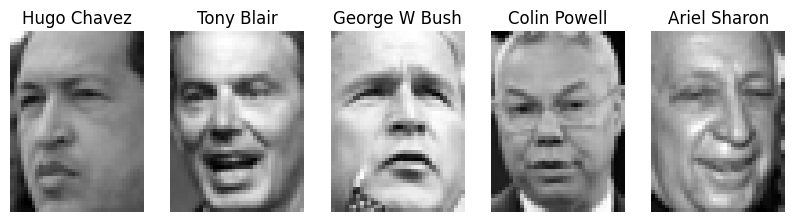

In [ ]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

# Veri setini yükle
lfw_dataset = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Veri seti bilgilerini göster
print("Görüntü boyutu:", lfw_dataset.images.shape)
print("Sınıf sayısı:", len(lfw_dataset.target_names))

# Örnek görüntüleri göster
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(lfw_dataset.images[i], cmap='gray')
    plt.title(lfw_dataset.target_names[lfw_dataset.target[i]])
    plt.axis('off')
plt.show()

3. Veri Ön İşleme


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Verileri normalize et
X = lfw_dataset.images.reshape((lfw_dataset.images.shape[0], lfw_dataset.images.shape[1], lfw_dataset.images.shape[2], 1))
X = X.astype('float32') / 255.

# Etiketleri one-hot encoding yap
y = to_categorical(lfw_dataset.target)

# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Eğitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)

Eğitim verisi boyutu: (1030, 50, 37, 1)
Test verisi boyutu: (258, 50, 37, 1)


4. CNN Modeli Oluşturma


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(lfw_dataset.target_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 35, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 7, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,871 (1.36 MB)

 Trainable params: 356,871 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

5. Model Eğitimi


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test))

6. Model Değerlendirme


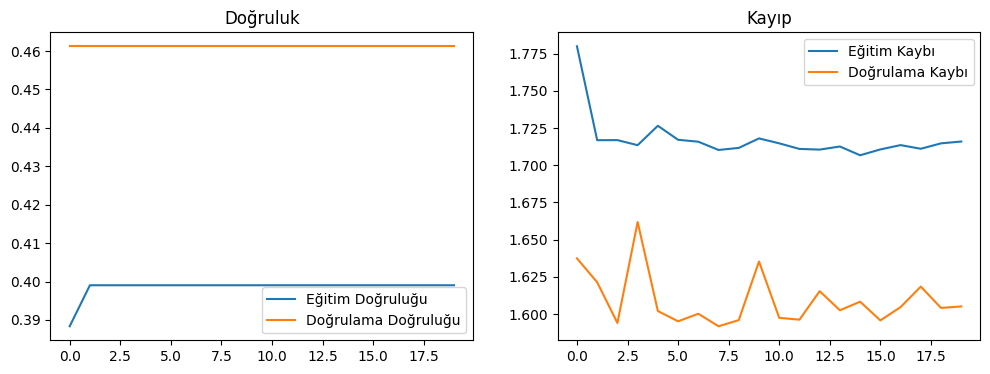

9/9 - 0s - 22ms/step - accuracy: 0.4612 - loss: 1.6052

Test Doğruluğu: 0.4612


In [ ]:
# Doğruluk ve kayıp grafikleri
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp')
plt.legend()
plt.show()

# Test setinde değerlendirme
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest Doğruluğu: {test_acc:.4f}")

7. Modeli Kullanarak Tahmin Yapma


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


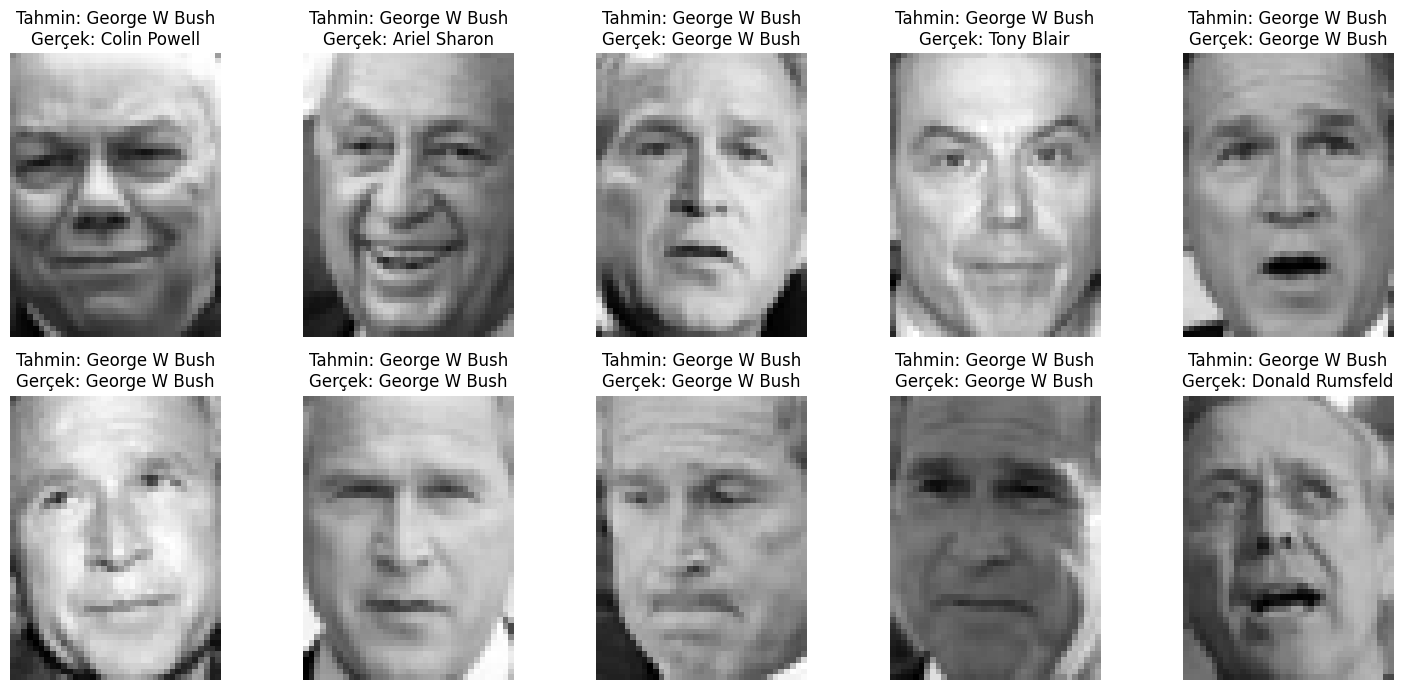

In [ ]:
# Rastgele test görüntüleri üzerinde tahmin
plt.figure(figsize=(15, 7))
for i in range(10):
    idx = np.random.randint(0, X_test.shape[0])
    img = X_test[idx]
    pred = model.predict(np.expand_dims(img, axis=0))
    predicted_class = np.argmax(pred)

    plt.subplot(2, 5, i+1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Tahmin: {lfw_dataset.target_names[predicted_class]}\nGerçek: {lfw_dataset.target_names[np.argmax(y_test[idx])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()